In [24]:
import torch
def getQ(path):
    try:
        checkpoint = torch.load(path, map_location='cpu' , weights_only=False)
        print(f"成功加载 checkpoint 文件: {path}\n")
    except FileNotFoundError:
        print(f"错误：未找到文件 {path}。请检查路径是否正确。")
        return None
    except Exception as e:
        print(f"加载文件时发生错误: {e}")
        return None
    print("尝试读取q")

    if 'q' in checkpoint['model']:
        q = checkpoint['model']['q']
    else:
        q = checkpoint['model']['agents']
    print(q.shape)
    print(q)
    print(f"q的均值:{q.mean()} , q的方差:{q.std()}")
    return q

In [28]:
checkpoint0 = "/home/u2023110769/code/RMT/classfication_release/work_dirs/tokengalerkin_v2_fixWeightDecay_specAgentsLr/backup0.pth"
checkpoint200 = "/home/u2023110769/code/RMT/classfication_release/work_dirs/checkpoint.pth"
q0 = getQ(checkpoint0)[0]
# q200 = checkpoint = torch.load(checkpoint0, map_location='cpu' , weights_only=False)['model']['layers.0.q_pos'][0]
q200 = getQ(checkpoint200)[0]

成功加载 checkpoint 文件: /home/u2023110769/code/RMT/classfication_release/work_dirs/tokengalerkin_v2_fixWeightDecay_specAgentsLr/backup0.pth

尝试读取q
torch.Size([1, 50, 64])
tensor([[[-1.1259, -1.1523, -0.2506,  ..., -1.2340,  1.8195, -0.5515],
         [-0.5693,  0.9201,  1.1108,  ...,  1.1648,  0.9232,  1.3872],
         [-0.8835, -0.4188, -0.8050,  ..., -0.9943, -1.1894, -1.1960],
         ...,
         [ 2.8423, -0.6401, -0.5873,  ..., -0.6380, -1.1715, -0.8413],
         [-2.1180, -0.0779, -0.1977,  ...,  0.0600, -0.9237, -0.1252],
         [-0.5603,  1.1515,  0.2366,  ..., -0.6379, -0.2284,  0.1562]]])
q的均值:-0.006753957364708185 , q的方差:1.0019428730010986
成功加载 checkpoint 文件: /home/u2023110769/code/RMT/classfication_release/work_dirs/checkpoint.pth

尝试读取q
torch.Size([1, 49, 64])
tensor([[[-0.8116, -0.9488,  0.1265,  ..., -1.2094,  1.8752, -0.3674],
         [-0.3192,  0.7527,  1.1904,  ...,  0.9144,  0.8132,  1.0750],
         [-0.2366, -0.2538, -0.6155,  ..., -1.1600, -1.1328, -1.1109],


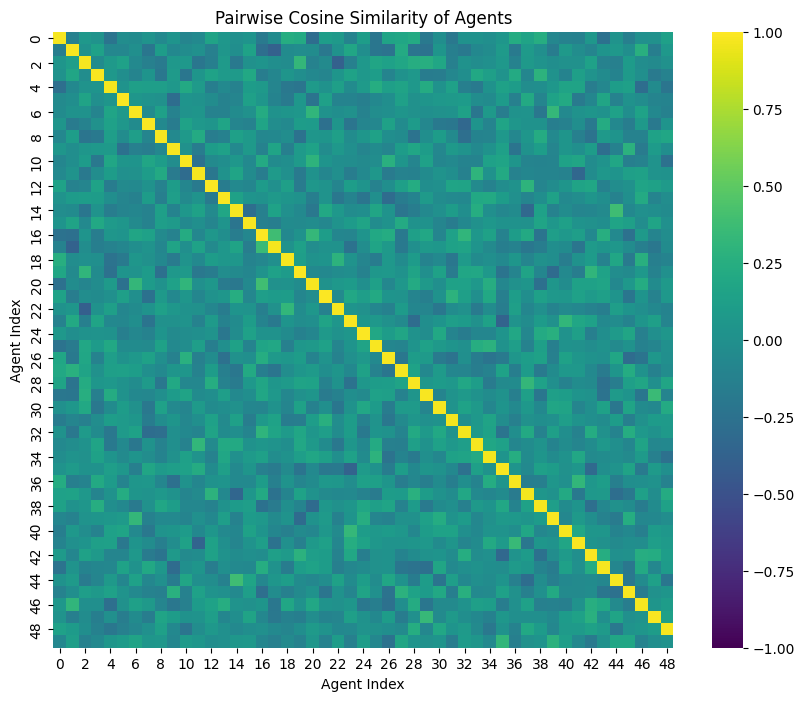

IndexError: boolean index did not match indexed array along axis 1; size of axis is 49 but size of corresponding boolean axis is 50

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# q0 = q0.detach().cpu()
q0_norm = torch.nn.functional.normalize(q0, p=2, dim=1)
q200_norm = torch.nn.functional.normalize(q200, p=2, dim=1)

sim_matrix = torch.mm(q0_norm, q200_norm.t()).numpy()


# 绘图
plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix, cmap='viridis', vmin=-1, vmax=1)
plt.title("Pairwise Cosine Similarity of Agents")
plt.xlabel("Agent Index")
plt.ylabel("Agent Index")
plt.show()

# 打印平均非对角线相似度
mask = ~np.eye(sim_matrix.shape[0], dtype=bool)
avg_sim = sim_matrix[mask].mean()
print(f"平均两两相似度: {avg_sim:.4f}")

# 打印平均对角线相似度
mask = ~mask
avg_sim = sim_matrix[mask].mean()
print(f"平均对角线相似度: {avg_sim:.4f}")